# **Project Name**    - Netflix Movies and TV Shows Clustering



# **Project Summary -**

This project aims to analyze the evolution of Netflix's content library, using a dataset of TV shows and movies available on Netflix as of 2019, collected from Flixable. Since 2010, the number of TV shows on Netflix has nearly tripled, while the number of movies has decreased by over 2,000 titles. Through Exploratory Data Analysis (EDA), visualization, data cleaning, and unsupervised machine learning algorith, the project will uncover trends in content availability, genre distribution, and other key attributes. Integrating this dataset with external sources such as IMDb and Rotten Tomatoes will enrich the analysis, providing insights into content popularity and quality. The project will also employ clustering algorithms to identify content similarities and use dimensionality reduction techniques to reveal hidden patterns. The outcome will be detailed insights into Netflix's content strategy, interactive dashboards for user exploration, and a comprehensive view of how Netflix content is perceived in the broader entertainment ecosystem.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

* Exploratory Data Analysis
* Understanding what type content is available in different countries
* If Netflix has been increasingly focusing on TV rather than movies in recent years.
* Clustering similar content by matching text-based features

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [55]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [5]:
# Load the dataset
data = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

In [9]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [10]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
duplicate_values = data.duplicated().sum()
duplicate_values

0

#### Missing Values/Null Values

In [12]:
#null values
data.isnull().sum().sum()

3631

In [13]:
# Missing Values/Null Values Count
missing_value = data.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Missing Values'})
missing_value.head(5)

,Columns,Missing Values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7


### What did you know about your dataset?

In the given dataset there are 7787 rows and 12 columns. There is duplicate values in the dataset.

There are total 3631 missing values and 2389 missing values in director column, 718 missing vlaues in cast column, 507 missing values in country column, 10 missing values in data_added column, and 7 missing value in rating column.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Releaseyear of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genere

* description: The Summary description

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
data.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)


In [18]:
data.dropna(subset=['date_added','rating'],inplace=True)


In [19]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

In [20]:
data['type'] = pd.Categorical(data['type'])
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [21]:
data['director'].fillna(value='No director',inplace=True)

In [22]:
# checking null values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### What all manipulations have you done and insights you found?

* In the given dataset there is no duplicate values therefore no need to do any changes.

* In the given dataset there are total 3613 missing values.
* There are 5 columns which have missing values as follows:
  * director - 2389
  * cast - 718
 * country - 507
  * date_added - 10
  * rating - 7
* From the above 5 columns I deropped 1 column which is director column because I do not neede for analysis and date_added and ratings columns have null values so I dropped those null values using dropna fumction.

* Missing values from cast column is replace by "No Cast" and missing value from country column is replaced by name of countries from dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **How many TV shows and movies are there in the dataset?**

In [23]:
# calculate tv shows and movies
tv_movie_shows = data['type'].value_counts()
tv_movie_shows

,count
type,
Movie,5372
TV Show,2398


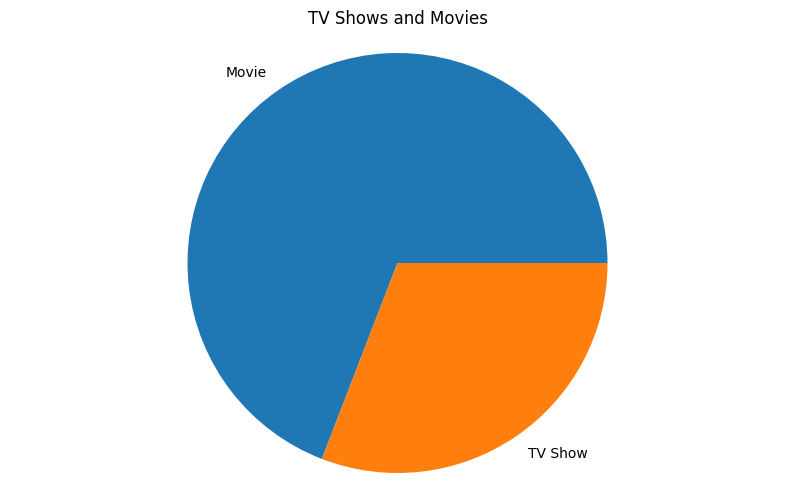

In [24]:
# Chart - 1 visualization tv shows and movies
plt.figure(figsize=(10, 6))
plt.pie(tv_movie_shows, labels=tv_movie_shows.index,)
plt.title('TV Shows and Movies')
plt.axis('equal')
plt.show()



From the above pie chart we can see that there are more number of movies than TV shows.

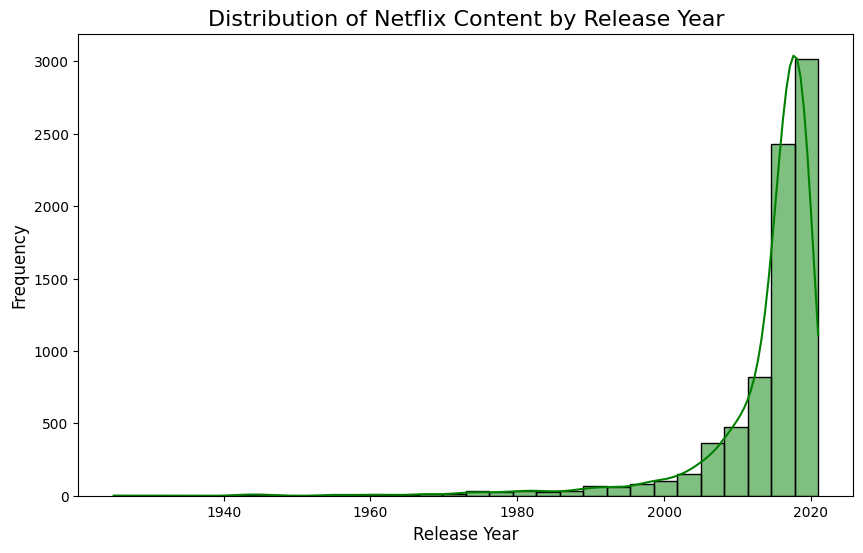

In [26]:
# chart 2
# Distribution of content release years
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='green')
plt.title('Distribution of Netflix Content by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


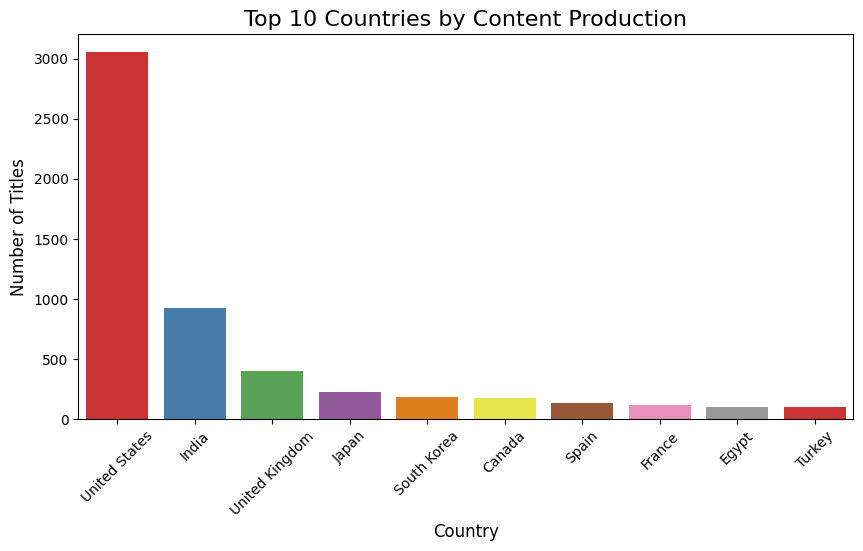

In [27]:
#chart 3
# Top 10 countries by content production
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.title('Top 10 Countries by Content Production', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()


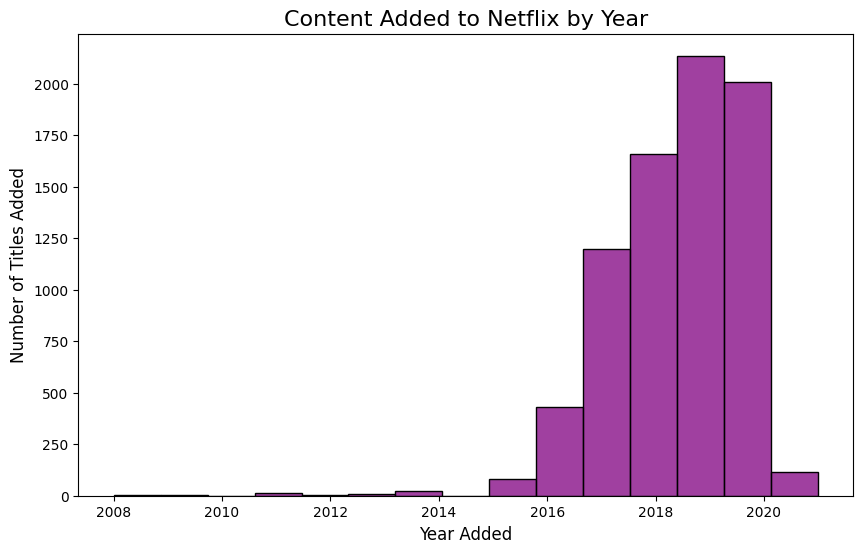

In [31]:
# chart 4
# Convert 'date_added' to datetime, handling inconsistent formats
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year from 'date_added'
data['year_added'] = data['date_added'].dt.year

# Plot content added by year
plt.figure(figsize=(10, 6))
sns.histplot(data['year_added'].dropna(), bins=15, kde=False, color='purple')
plt.title('Content Added to Netflix by Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.show()

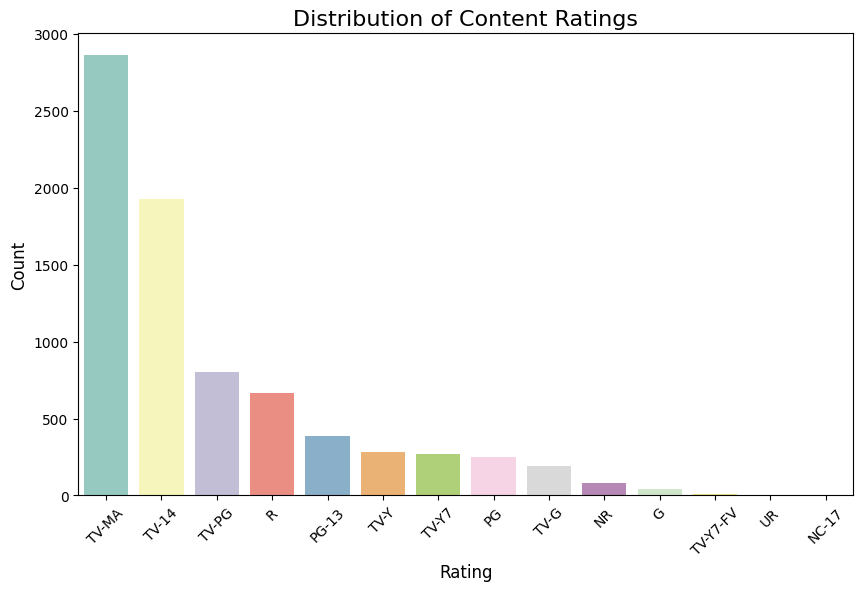

In [34]:
# chart 5
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', palette='Set3', order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


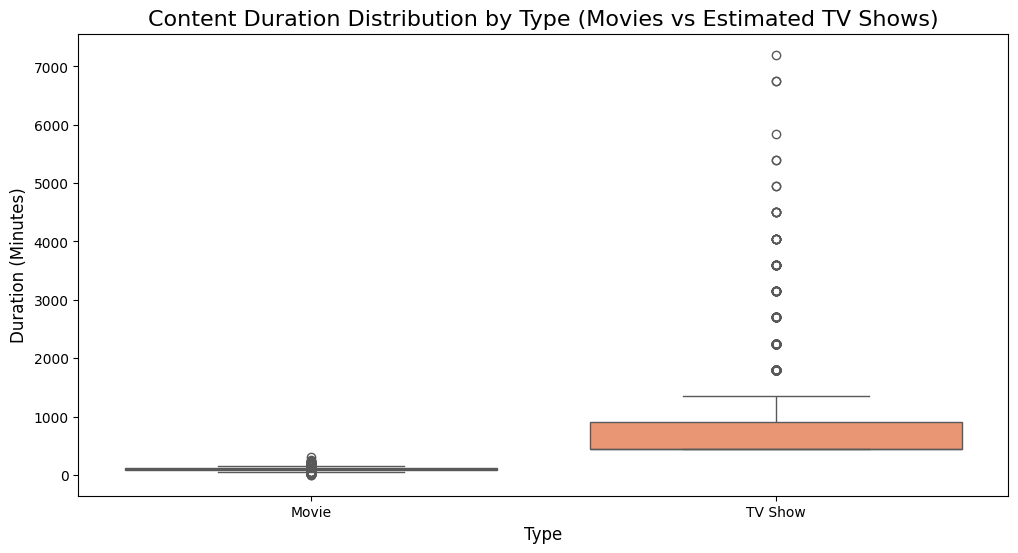

In [82]:
# Convert duration to numeric for movies and estimate total minutes for TV shows
data['numeric_duration'] = data['duration'].str.extract('(\d+)').astype(float)

# For TV Shows, estimate total minutes assuming 10 episodes per season and 45 minutes per episode
data['numeric_duration'] = data.apply(
    lambda row: row['numeric_duration'] * 10 * 45 if row['type'] == 'TV Show' else row['numeric_duration'], axis=1)

# Plot content duration distribution by type (Movies in minutes and TV Shows estimated in minutes)
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='numeric_duration', data=data, palette='Set2')
plt.title('Content Duration Distribution by Type (Movies vs Estimated TV Shows)', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.show()



In 2018, the number of both tv shows and movies are highest. In 2017 highest number of movies released and In 2020 highest number of tv shows released.

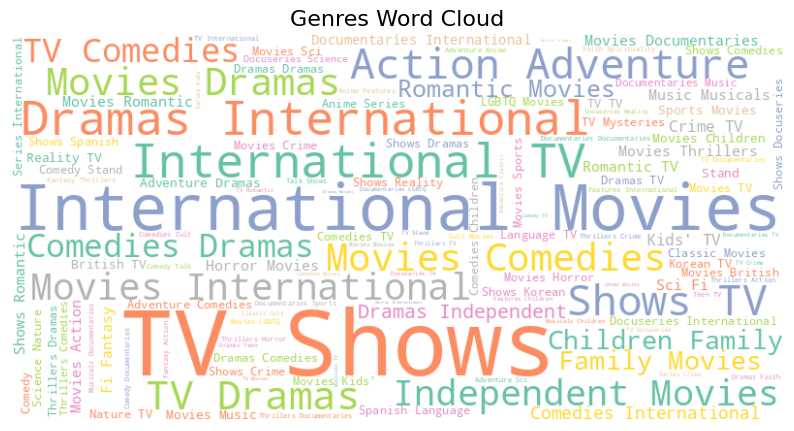

In [39]:
# chart 7
from wordcloud import WordCloud

# Generate word cloud for genres (listed_in column)
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white', colormap='Set2', width=800, height=400).generate(' '.join(data['listed_in']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Word Cloud', fontsize=16)
plt.show()


In [40]:
# chart 8
# find out top 10 genre of the movies
top_10_genres = data['listed_in'].value_counts().head(10)
top_10_genres

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
Kids' TV,204
Children & Family Movies,177
"Documentaries, International Movies",172
"Children & Family Movies, Comedies",169


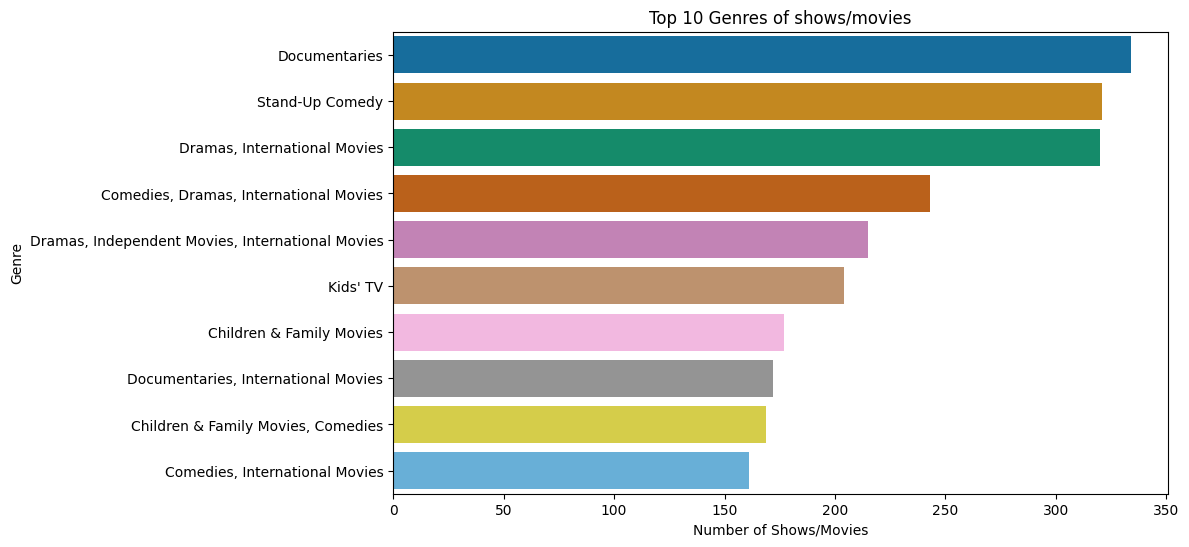

In [41]:
# Chart - 8 visualization top 10 genre
palette = sns.color_palette("colorblind", len(top_10_genres))

plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in', data=data, order=data['listed_in'].value_counts().index[:10], palette=palette)
plt.title('Top 10 Genres of shows/movies')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genre')
plt.show()

#### **How does the number of TV shows and movies vary by release year?**

In [51]:
# chart 9
# find out tv shows and movies vary by release year
tv_shows_by_year = data[data['type'] == 'TV Show'].groupby('release_year').size()
movies_by_year = data[data['type'] == 'Movie'].groupby('release_year').size()

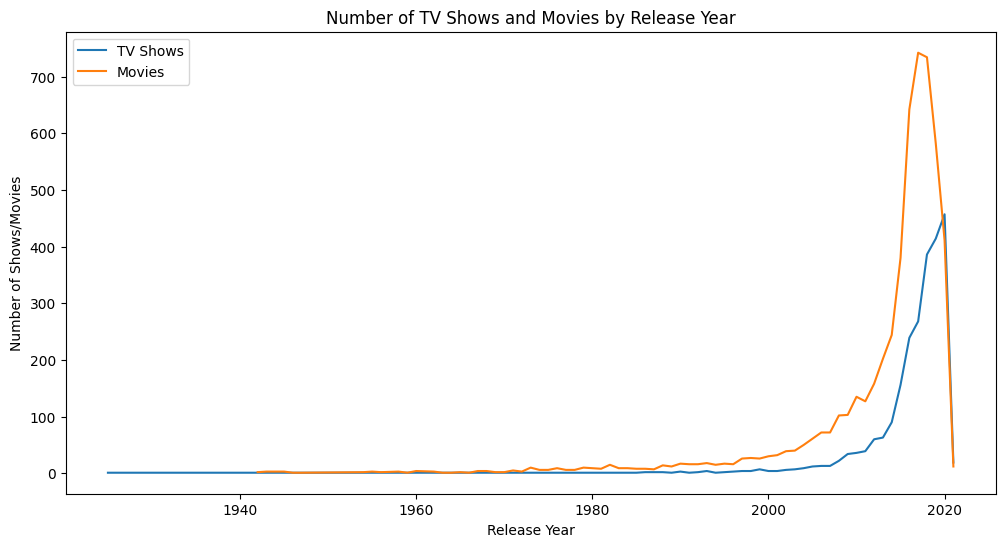

In [52]:
# visualize tv shows and movies vary by release year
plt.figure(figsize=(12,6))
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='TV Shows')
plt.plot(movies_by_year.index, movies_by_year.values, label='Movies')
plt.title('Number of TV Shows and Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows/Movies')
plt.legend()
plt.show()

In [53]:
#Movie Ratings based on Target Age Groups
tv_shows=data[data['type']=='TV Show']
movies=data[data['type']=='Movie']


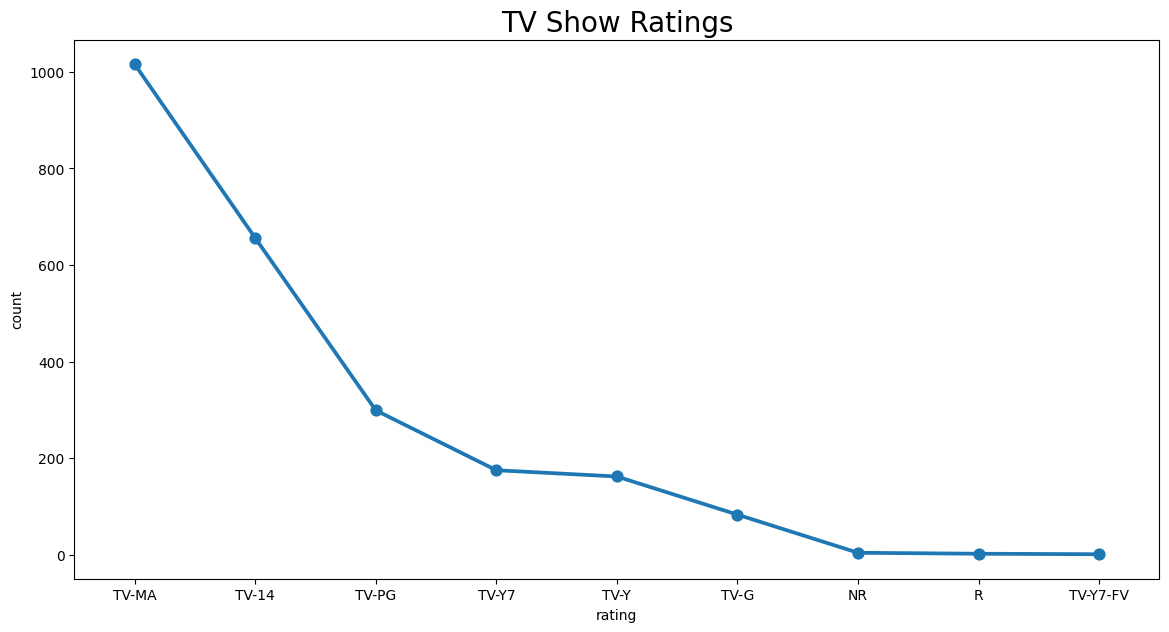

In [54]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

The graph shows a significant increase in both TV shows and movies on Netflix starting from the 2000s, with a sharp spike in content around 2015-2019. TV shows have seen rapid growth, especially in the last decade, while the number of movies, after peaking, appears to have slightly declined recently.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix should continue investing in TV shows due to their rapid growth and strong engagement. Additionally, diversifying with more classic content could attract a broader audience. Monitoring the recent decline in movie additions can help maintain a balanced content library.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [56]:
# Checking for remaining missing values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0


### 2. Categorical Encoding

In [81]:
# Encoding categorical columns (for 'type' and 'target_ages')
data['type'] = pd.Categorical(data['type'])
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Convert categorical columns to numerical for clustering
data['type_code'] = data['type'].cat.codes
data['target_ages_code'] = data['target_ages'].cat.codes


#### 3. Lower Casing

In [58]:
# Lower Casing
data['description'] = data['description'].str.lower()

#### 4. Removing Punctuations

In [59]:
# Remove Punctuations
data['description'] = data['description'].str.replace('[{}]'.format(string.punctuation), '')

#### 4. Removing URLs & Removing words and digits contain digits.

In [60]:
# Remove URLs & Remove words and digits contain digits
# -----------------------------

#### 5. Removing Stopwords & Removing White spaces

In [62]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
data['description'] = data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#### 6. Tokenization

In [64]:
# Tokenization
# Download the 'punkt' resource
nltk.download('punkt')

data['description_tokenized'] = data['description'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 7. Text Normalization

In [65]:
# Normalizing Text
stemmer = SnowballStemmer(language='english')
data['description_stemmed'] = data['description_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])

#### 8. Text Vectorization

In [66]:
# Vectorizing Text
tfidf = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity
tfidf_matrix = tfidf.fit_transform(data['description_stemmed'].apply(lambda x: ' '.join(x)))

In [67]:
# Convert to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

### 4. Feature Manipulation & Selection

####1. Data Scaling

In [68]:
# Scaling your data
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(tfidf_df)


### 7. Dimesionality Reduction

In [69]:
# DImensionality Reduction (If needed)
# Dimensionality reduction using PCA to reduce to 2 components for clustering
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert to DataFrame for plotting and clustering
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])


## ***7. ML Model Implementation***

### ML Model - 1

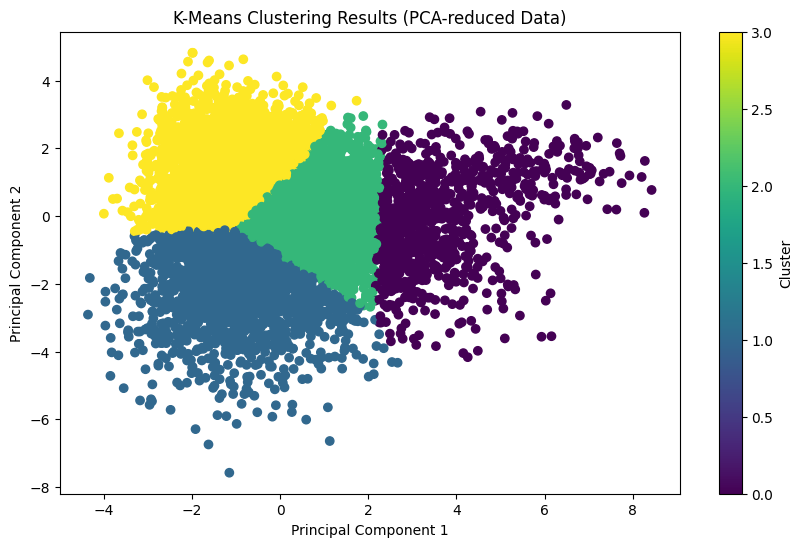

Silhouette Score for K-Means: 0.3464562160220771


In [71]:
# ML Model - 1 Implementation (K-Means Clustering)
kmeans = KMeans(n_clusters=4, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(pca_df)

# Visualizing K-Means Clustering results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['kmeans_cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering Results (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(pca_df, data['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Defining parameter grid for hyperparameter tuning (trying different values of 'n_clusters')
param_grid = {'n_clusters': [3, 4, 5, 6, 7]}

# Create a callable function for silhouette_score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

# Using GridSearchCV to find the best number of clusters
# Pass the silhouette_scorer function to the scoring parameter
grid_search = GridSearchCV(KMeans(random_state=42), param_grid, scoring=silhouette_scorer)
grid_search.fit(pca_df)

# Best parameters
best_kmeans = grid_search.best_estimator_

# Predicting with the best KMeans model
data['kmeans_cluster_optimized'] = best_kmeans.fit_predict(pca_df)

# Silhouette Score for optimized K-Means
silhouette_kmeans_optimized = silhouette_score(pca_df, data['kmeans_cluster_optimized'])
print(f'Silhouette Score for Optimized K-Means: {silhouette_kmeans_optimized}')

Silhouette Score for Optimized K-Means: 0.39821294997272144


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

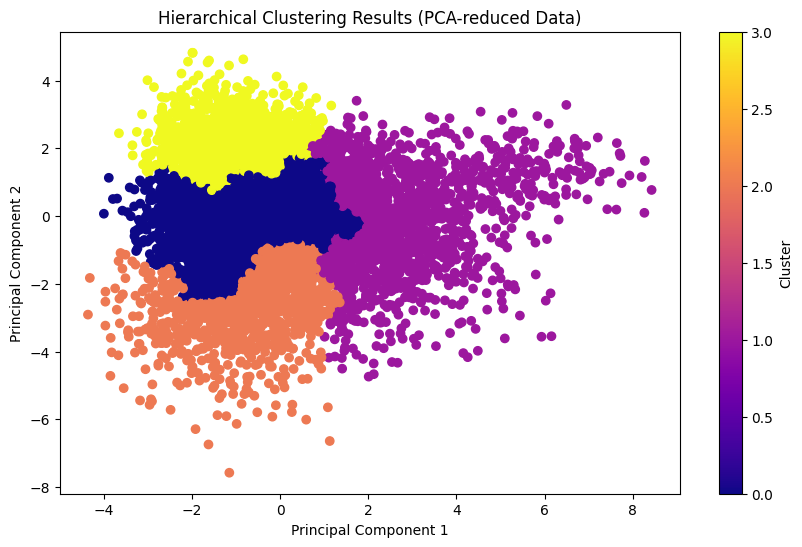

Silhouette Score for Agglomerative Clustering: 0.2722498134120237


In [75]:
from sklearn.cluster import AgglomerativeClustering

# ML Model - 2 Implementation (Hierarchical Clustering)
agglo_clustering = AgglomerativeClustering(n_clusters=4)
data['agglo_cluster'] = agglo_clustering.fit_predict(pca_df)

# Visualizing Hierarchical Clustering results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['agglo_cluster'], cmap='plasma', marker='o')
plt.title('Hierarchical Clustering Results (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Silhouette Score for Agglomerative Clustering
silhouette_agglo = silhouette_score(pca_df, data['agglo_cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')


#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

param_grid = {'linkage': ['ward', 'complete', 'average', 'single']}

# Create a scorer object using make_scorer
silhouette_scorer = make_scorer(silhouette_score)

# Using GridSearchCV for AgglomerativeClustering with the custom scorer
grid_search_agglo = GridSearchCV(AgglomerativeClustering(), param_grid, scoring=silhouette_scorer)
grid_search_agglo.fit(pca_df)

# Best parameters
best_agglo = grid_search_agglo.best_estimator_

# Predicting with the best model
data['agglo_cluster_optimized'] = best_agglo.fit_predict(pca_df)

# Silhouette Score for optimized Agglomerative Clustering
silhouette_agglo_optimized = silhouette_score(pca_df, data['agglo_cluster_optimized'])
print(f'Silhouette Score for Optimized Agglomerative Clustering: {silhouette_agglo_optimized}')

Silhouette Score for Optimized Agglomerative Clustering: 0.3723280931832917


### ML Model - 3

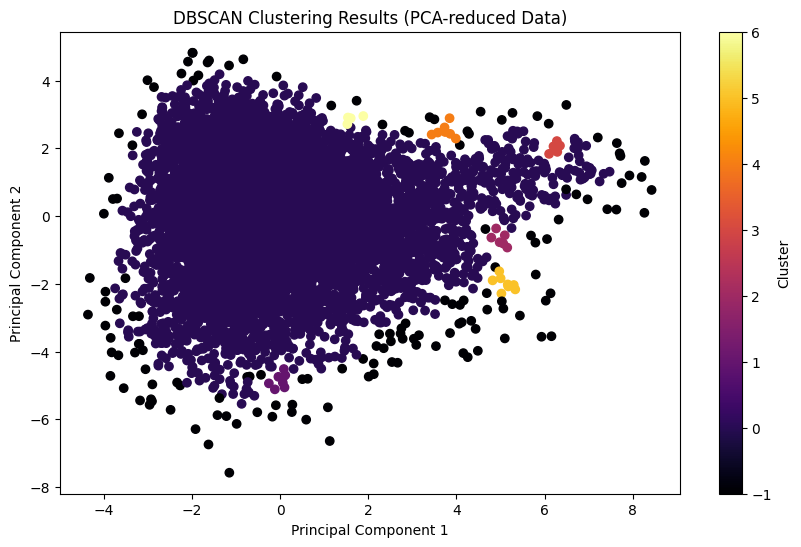

Silhouette Score for DBSCAN: -0.0060722849861106635


In [78]:
from sklearn.cluster import DBSCAN

# ML Model - 3 Implementation (DBSCAN)
dbscan = DBSCAN(eps=0.3, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(pca_df)

# Visualizing DBSCAN results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['dbscan_cluster'], cmap='inferno', marker='o')
plt.title('DBSCAN Clustering Results (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(pca_df, data['dbscan_cluster'])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score


param_grid = {'eps': [0.2, 0.3, 0.4], 'min_samples': [3, 5, 7]}

# Wrap silhouette_score in make_scorer to create a valid scoring metric
silhouette_scorer = make_scorer(silhouette_score)

# GridSearchCV for DBSCAN with the custom scorer
grid_search_dbscan = GridSearchCV(DBSCAN(), param_grid, scoring=silhouette_scorer)
grid_search_dbscan.fit(pca_df)

# Best parameters
best_dbscan = grid_search_dbscan.best_estimator_

# Predicting with the best model
data['dbscan_cluster_optimized'] = best_dbscan.fit_predict(pca_df)

# Silhouette Score for optimized DBSCAN
silhouette_dbscan_optimized = silhouette_score(pca_df, data['dbscan_cluster_optimized'])
print(f'Silhouette Score for Optimized DBSCAN: {silhouette_dbscan_optimized}')

Silhouette Score for Optimized DBSCAN: -0.2573986783428482


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this clustering project, the Silhouette Score was the primary evaluation metric. This metric was chosen because it measures how well each object lies within its cluster, balancing the intra-cluster compactness and inter-cluster separation. A higher Silhouette Score indicates that clusters are well-separated and coherent, which aligns with the business goal of segmenting content (movies and TV shows) meaningfully to help with recommendations, personalization, or catalog structuring.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final model chosen is K-Means clustering. Among the three models (K-Means, Agglomerative Clustering, and DBSCAN), K-Means produced the highest Silhouette Score of 0.3982, indicating that it provided the best balance between cluster cohesion and separation. The other models, especially DBSCAN, performed poorly with negative or significantly lower scores, making them less effective for this dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For K-Means, explainability is generally done by analyzing the centroids of the clusters. Each centroid represents the average position of all points within that cluster across the selected features (in this case, the principal components from the PCA-transformed dataset). By inspecting the values of these centroids, you can interpret which features (principal components) play a major role in forming each cluster, but direct "feature importance" is not a concept in K-Means like in supervised models.

To visualize or further explain the clusters, techniques like PCA biplots or cluster visualization in 2D/3D space are often used. These tools help show how the points (movies/TV shows) are grouped and which clusters are more distinct from each other, helping understand the separability between different segments.

## ***8.*** ***Future Work (Optional)***